## The Analysis of Sperantov's Data On The Russian Tragedy

In this analysis, we explore Sperantov's data on the Russian tragedies obtained from Sperantov's article *Poetika remarki v russkoi tragedii XVIII- nachala XIX veka* (1998). In this article, Sperantov traces the evolution of the Russian tragedy based on the following features:

1. We will address heterogeneity by limiting the corpus to the original tragedies with 5 acts;
2. We will check Sperantov's features for normality using using Shapiro-Wilk normality test. This will guide our choice of parametric vs. non-parametric statistical tests. If the features are not normally distributed, we will use non-parametric tests. 
3. We will run statistical tests to determine whether the four periods distinguished by Sperantov in his article are statistically different. The four periods include:
    - Period One: 1747 to 1762
    - Period Two: 1763 to 1794
    - Period Three: 1795 to 1810
    - Period Four: 1811 to 1822
4. We will create visualization for each feature;
5. We will run descriptive statistcs for each feature;

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import kruskal
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
def summary(feature):
    mean = feature.mean()
    std = feature.std()
    median = feature.median()
    
    return mean, std, median

In [3]:
# the boundaries were proposed by Sperantov
def determine_period(row):
    if row <= 1762:
        period = 1
    elif row >= 1763 and row <= 1794:
        period = 2
    elif row >= 1795 and row <= 1810:
        period = 3
    else:
        period = 4
    
    return period

In [4]:
def make_plot(feature, title):
    mean, std, median = summary(feature)
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=17)
    sns.distplot(feature, kde=False)
    mean_line = plt.axvline(mean, 
                            color='black',
                            linestyle='solid', 
                            linewidth=2); M1 = 'Mean';
    median_line = plt.axvline(median, 
                               color='green',linestyle='dashdot', 
                               linewidth=2); M2='Median'
    std_line = plt.axvline(mean + std, 
                           color='black',
                           linestyle='dashed', 
                           linewidth=2); M3 = 'Standard deviation';
    plt.axvline(mean - std, 
                color='black',
                linestyle='dashed', 
                linewidth=2)

    plt.legend([mean_line, median_line, std_line], [M1, M2, M3])
    plt.show()

In [5]:
def small_sample_mann_whitney_u_test(series_one, series_two):
    values_one = series_one.sort_values().tolist()
    values_two = series_two.sort_values().tolist()
    # make sure there are no ties  - this function only works for no ties
    result_df = pd.DataFrame(values_one + values_two, columns=['combined']).sort_values(by='combined')
    # average for ties
    result_df['ranks'] = result_df['combined'].rank(method='average')
    # make a dictionary where keys are values and values are ranks
    val_to_rank = dict(zip(result_df['combined'].values, result_df['ranks'].values))
    sum_ranks_one = np.sum([val_to_rank[num] for num in values_one])
    sum_ranks_two = np.sum([val_to_rank[num] for num in values_two])
    # number in sample one and two
    n_one = len(values_one) 
    n_two = len(values_two)
    # calculate the mann whitney u statistic which is the smaller of the u_one and u_two
    u_one = ((n_one * n_two) + (n_one * (n_one + 1) / 2)) - sum_ranks_one
    u_two = ((n_one * n_two) + (n_two * (n_two + 1) / 2)) - sum_ranks_two                     
    # add a quality check 
    assert u_one + u_two == n_one * n_two
    u_statistic = np.min([u_one, u_two])
    
    return u_statistic

In [6]:
def run_tests(test, feature):
    """
    The function allows us to run a statistical test of our choice on the adjacent periods.
    Params:
        test - a test of our choice, e.g., Mann Whitney U Test.
        feature - str, name of the feature we want to test on.
    Returns:
        no retun, prints the result of each test
    """
    result_one = test(period_one[feature], 
             period_two[feature]) 
    print('Period one and two:', '\n', 'test statistic:', result_one)
    
    result_two = test(period_two[feature], 
             period_three[feature]) 
    print('Period two and three:', '\n', 'test statistic:', result_two)
    
    result_three = test(period_three[feature], 
             period_four[feature]) 
    print('Period three and four:', '\n','test statistic:', result_three) 

## Part 1. Description of Sperantov's Features

- **Stage directions frequency (P)**:
    - $P = n/N * 100$, 
where n is the raw number of stage directions and N is the raw number of verse lines in a play.
- **Average length of a stage direction (S)**, i.e., the frequency of the appearance of stage directions within the poetic line:
    - $S = L/n$ , where L is the raw number of word tokens in the stage directions and n is the raw number of stage directions.
- **The degree of verse and prose interaction (I)**:
    - $I = (q/N) * 100$, where q is the raw number of stage directions splitting verse lines and N is the raw number of verse lines in a play.
-  **The sentiment coefficient (C)**:
    - $C = c/n * 100%$, where c is the raw number of stage directions describing a character’s sentiment and n is the raw number of stage directions. According to Speranotv, this feture is least objectively quantifiable (Sperantov 1998, 9-13).
- **Lexical diversity of the stage directions (V)**:
    - $V = l/L$, where l is the raw number of lexemes and L is the raw number of word forms (tokens) in a play. Sperantov 


In [7]:
sperantov_data = pd.read_csv('sperantov_raw_data.tsv', sep='\t')

In [8]:
sperantov_data.head()

,last_name,first_name,title,date,num_acts,translation/adaptation/mixed_genre,frequency,average_length,verse_prose_interaction,lexical_diversity,sentiment_coefficient,Style_Sperantov
0,Sumarokov,Aleskandr,Khorev,1747,5,0,2.57,3.41,0.44,0.35,0.00,Conservative Neoclassicism
1,Sumarokov,Aleskandr,Gamlet,1748,5,1,2.69,3.54,0.51,0.40,5.40,Moderate Neoclassicism
2,Sumarokov,Aleskandr,Sinav i Truvor,1750,5,0,4.19,2.75,0.63,0.28,3.12,Conservative Neoclassicism
3,Sumarokov,Aleskandr,Argistona,1750,5,0,2.59,3.47,0.20,0.24,2.63,Conservative Neoclassicism
4,Lomonosov,Mikhail,Tamira i Selim,1750,5,0,3.32,2.98,0.25,0.21,0.00,Conservative Neoclassicism


In [9]:
sperantov_data.shape

(70, 12)

In [10]:
sperantov_data['num_acts'].unique()

array([5, 3, 0])

In [11]:
sperantov_data.dtypes

last_name                              object
first_name                             object
title                                  object
date                                   object
num_acts                                int64
translation/adaptation/mixed_genre      int64
frequency                             float64
average_length                        float64
verse_prose_interaction               float64
lexical_diversity                     float64
sentiment_coefficient                 float64
Style_Sperantov                        object
dtype: object

In [12]:
# remove tragedies which are not five acts or are translations/ immitations
sperantov_data_five_acts = sperantov_data[(sperantov_data['num_acts']==5) & 
                                         (sperantov_data['translation/adaptation/mixed_genre'] == 0)].copy()

In [13]:
sperantov_data_five_acts.columns = [col.strip() for col in sperantov_data_five_acts.columns]

In [14]:
sperantov_data_five_acts.head()

,last_name,first_name,title,date,num_acts,translation/adaptation/mixed_genre,frequency,average_length,verse_prose_interaction,lexical_diversity,sentiment_coefficient,Style_Sperantov
0,Sumarokov,Aleskandr,Khorev,1747,5,0,2.57,3.41,0.44,0.35,0.00,Conservative Neoclassicism
2,Sumarokov,Aleskandr,Sinav i Truvor,1750,5,0,4.19,2.75,0.63,0.28,3.12,Conservative Neoclassicism
3,Sumarokov,Aleskandr,Argistona,1750,5,0,2.59,3.47,0.20,0.24,2.63,Conservative Neoclassicism
4,Lomonosov,Mikhail,Tamira i Selim,1750,5,0,3.32,2.98,0.25,0.21,0.00,Conservative Neoclassicism
5,Trediakovskii,Vasilii,Deidamiia,1750,5,0,6.82,4.88,1.04,0.28,9.24,Non_Classified


In [15]:
sperantov_data_five_acts.shape

(53, 12)

In [16]:
sperantov_data_five_acts.columns

Index(['last_name', 'first_name', 'title', 'date', 'num_acts',
       'translation/adaptation/mixed_genre', 'frequency', 'average_length',
       'verse_prose_interaction', 'lexical_diversity', 'sentiment_coefficient',
       'Style_Sperantov'],
      dtype='object')

In [17]:
# some tragedies do no have exact date
sperantov_data_five_acts['date'].unique()

array(['1747', '1750', '1751', '1758', '1762', '1767', '1768', '1769',
       '1771', '1772', '1773', '1774', 'mid-1770s', '1779', '1780',
       '1781', '1782', '1784', '1785', '1786', 'around 1787', '1787',
       '1789', '1794', '1798', '1806', '1807', '1808', '1808-1809',
       '1809', '1810', '1811', '1814', '1815', '1810s', '1822'],
      dtype=object)

In [18]:
# since we are mainly interested in different periods, we will update the years so that they remain in the same period,
# but are easier to convert to numeric data format  
sperantov_data_five_acts.loc[sperantov_data_five_acts[
                            sperantov_data_five_acts.date == 'mid-1770s'].index[0], 'date'] = 1775
sperantov_data_five_acts.loc[sperantov_data_five_acts[
                            sperantov_data_five_acts.date == 'around 1787'].index[0], 'date'] = 1787
sperantov_data_five_acts.loc[sperantov_data_five_acts[
                            sperantov_data_five_acts.date == '1808-1809'].index, 'date'] = 1808

sperantov_data_five_acts.loc[sperantov_data_five_acts[
                            sperantov_data_five_acts.date == '1810s'].index, 'date'] = 1811

In [19]:
# some tragedies do no have exact date
sperantov_data_five_acts['date'].unique()

array(['1747', '1750', '1751', '1758', '1762', '1767', '1768', '1769',
       '1771', '1772', '1773', '1774', 1775, '1779', '1780', '1781',
       '1782', '1784', '1785', '1786', 1787, '1787', '1789', '1794',
       '1798', '1806', '1807', '1808', 1808, '1809', '1810', '1811',
       '1814', '1815', 1811, '1822'], dtype=object)

In [20]:
sperantov_data_five_acts['date'] = sperantov_data_five_acts['date'].astype(int)

In [21]:
sperantov_data_sorted = sperantov_data_five_acts.sort_values(by='date')

## Part 2. Feature Correlations

In [22]:
sperantov_data_sorted[['frequency', 
                        'average_length',
                        'verse_prose_interaction', 
                        'sentiment_coefficient',
                        'lexical_diversity']].corr()

,frequency,average_length,verse_prose_interaction,sentiment_coefficient,lexical_diversity
frequency,1.000000,0.492733,0.857964,0.715484,-0.075748
average_length,0.492733,1.000000,0.438400,0.430335,0.180735
verse_prose_interaction,0.857964,0.438400,1.000000,0.823541,0.017155
sentiment_coefficient,0.715484,0.430335,0.823541,1.000000,0.147279
lexical_diversity,-0.075748,0.180735,0.017155,0.147279,1.000000


Lexical diversity appears to be the only feature that is either negatively correlated (-0.075 with frequency of stage directions) or weakly correlated with other features (0.18 with average length of a stage direction), 0.017 with the degree of verse and prose interaction, and 0.147 with the sentiment coefficient).

The average length of a stage direction was moderately correlated with all other features, excluding the lexical diversity coefficient (0.493 with the frequency of stage directions, 0.438 with the degree of verse and prose interaction, and 0.43 with the sentiment coefficient).

The frequency of stage directions, the degree of verse and prose interaction, and the sentiment coefficient are all strongly correlated. The correlation coefficient of the frequency of stage directions with the with the degree of verse and prose interaction is 0.858, with the sentiment coefficient  it is 0.716. The correlation coefficient of the sentiment coefficient with the degree of verse and prose interaction is 0.824. The more stage directions a tragedy has, the higher are the odds that the stage directions will be splitting verse lines and will be expressing sentiments of dramatic characters.

## Part 3. Feature Distributions and Normality

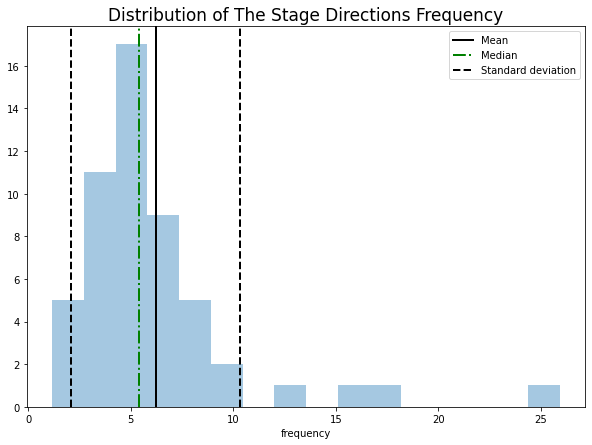

In [23]:
make_plot(sperantov_data_sorted['frequency'], 
         'Distribution of The Stage Directions Frequency')

In [24]:
mean, std, median = summary(sperantov_data_sorted['frequency'])
print('Mean number of the stage directions frequency:', round(mean, 2))
print('Standard deviation of the stage directions frequency:', round(std, 2))
print('Median stage directions frequency:', median)

Mean number of the stage directions frequency: 6.22
Standard deviation of the stage directions frequency: 4.12
Median stage directions frequency: 5.39


### Shapiro-Wilk Normality Test

In [25]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sperantov_data_sorted['frequency'])[1])

The p-value of the Shapiro-Wilk normality test: 1.035402696913934e-08


The Shapiro-Wilk test showed that the probability of data being normally distributed is very low (p-value=1.035402696913934e-08).

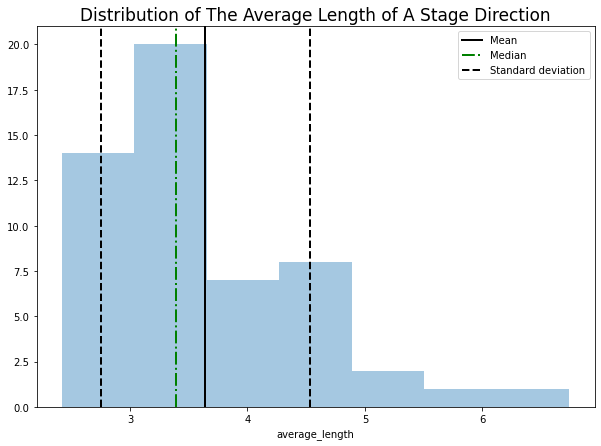

In [26]:
make_plot(sperantov_data_sorted['average_length'], 
         'Distribution of The Average Length of A Stage Direction')

In [27]:
mean, std, median = summary(sperantov_data_sorted['average_length'])
print('Mean number of the average length of a stage direction:', round(mean, 2))
print('Standard deviation of the average length of a stage direction:', round(std, 2))
print('Median average length of a stage direction:', round(median, 2))

Mean number of the average length of a stage direction: 3.64
Standard deviation of the average length of a stage direction: 0.89
Median average length of a stage direction: 3.39


In [28]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sperantov_data_sorted['average_length'])[1])

The p-value of the Shapiro-Wilk normality test: 0.0005773700540885329


The Shapiro-Wilk test showed that the probability of the data being normally distributed is extremely low (0.0005773700540885329).

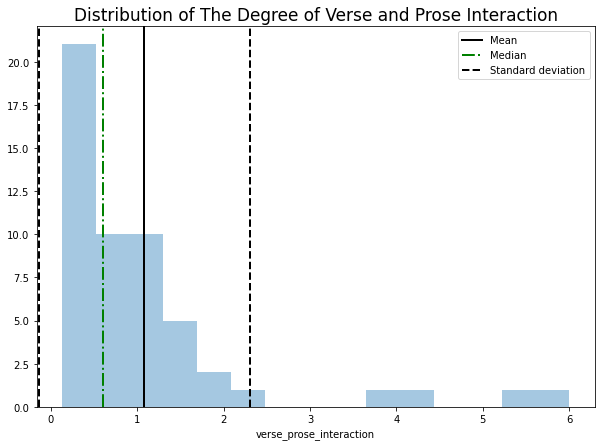

In [29]:
make_plot(sperantov_data_sorted['verse_prose_interaction'], 
         'Distribution of The Degree of Verse and Prose Interaction')

In [30]:
mean, std, median = summary(sperantov_data_sorted['verse_prose_interaction'])
print('Mean number of the degree of verse and prose interaction:', round(mean, 2))
print('Standard deviation of the degree of verse and prose interaction:', round(std, 2))
print('Median average length of the degree of verse and prose interaction:', round(median, 2))

Mean number of the degree of verse and prose interaction: 1.08
Standard deviation of the degree of verse and prose interaction: 1.22
Median average length of the degree of verse and prose interaction: 0.61


In [31]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sperantov_data_sorted['verse_prose_interaction'])[1])

The p-value of the Shapiro-Wilk normality test: 8.268730700144999e-10


The Shapiro-Wilk test revealed that the probability of the data being normally distributed is very low (8.268730700144999e-10).

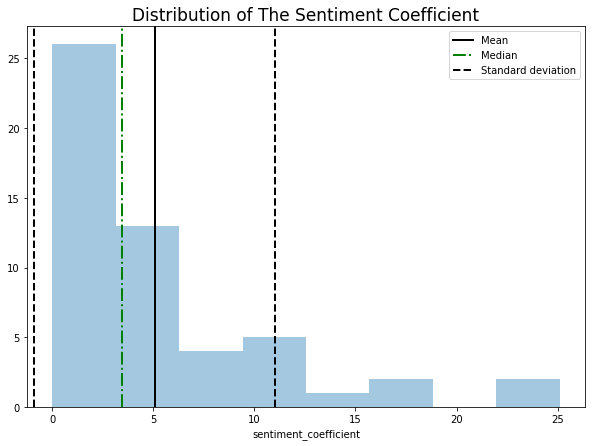

In [32]:
make_plot(sperantov_data_sorted['sentiment_coefficient'], 
         'Distribution of The Sentiment Coefficient')

In [33]:
mean, std, median = summary(sperantov_data_sorted['sentiment_coefficient'])
print('Mean number of the sentiment coefficient:', round(mean, 2))
print('Standard deviation of the sentiment coefficient:', round(std, 2))
print('Median average length of the sentiment coefficient:', median)

Mean number of the sentiment coefficient: 5.08
Standard deviation of the sentiment coefficient: 5.97
Median average length of the sentiment coefficient: 3.45


In [34]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sperantov_data_sorted['sentiment_coefficient'])[1])

The p-value of the Shapiro-Wilk normality test: 5.001967906537175e-07


The Shapiro-Wilk showed that the probability of the sentiment coefficient being normally distributed is very low (p-value = 5.001967906537175e-07).

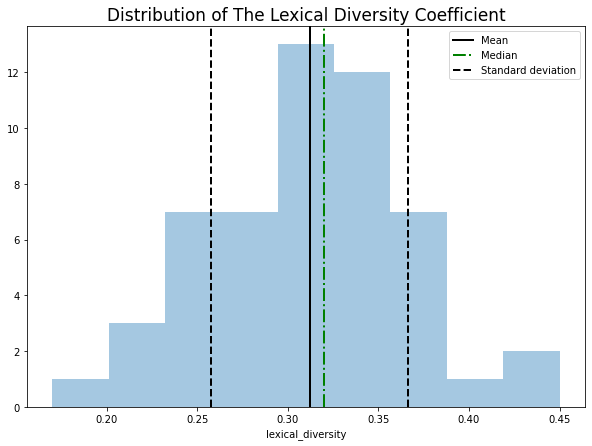

In [35]:
make_plot(sperantov_data_sorted['lexical_diversity'], 
         'Distribution of The Lexical Diversity Coefficient')

In [36]:
mean, std, median = summary(sperantov_data_sorted['lexical_diversity'])
print('Mean number of the lexical diversity coefficient:', round(mean, 2))
print('Standard deviation of the lexical diversity coefficient:', round(std, 2))
print('Median average length of the lexical diversity coefficient:', median)

Mean number of the lexical diversity coefficient: 0.31
Standard deviation of the lexical diversity coefficient: 0.05
Median average length of the lexical diversity coefficient: 0.32


In [37]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sperantov_data_sorted['lexical_diversity'])[1])

The p-value of the Shapiro-Wilk normality test: 0.8438912034034729


Based on the results of the Shapiro-Wilk test, lexical diversity coefficient is very likely to be normally distributed (p-value = 0.8438912034034729). 

### Summary:

Out of five features, only one feature (the coefficient of lexical diversity) was normally distributed. In such a case, it is more fitting to use **non-parametric statistical tests** that do not assume that the data is normally distributed. In this case, we will run the Kruskal-Wallis H-test to check if there are differences at least between some of the periods. If the Kruskal-Wallis test returns a significant result, we will follow up with Mann-Whitney U-test to see between which periods these differences are.

## Part 4. Hypothesis Testing

We will run statistical tests to determine whether our hypothesized periods are significantly different:    
    - Period One: 1747 to 1762
    - Period Two: 1763 to 1794
    - Period Three: 1795 to 1810
    - Period Four: 1811 to 1822
    
First, we will use scipy.stats Python library and run **the Kruskal-Wallis test** to see whether there are significant differences between any periods at all. Our null hypothesis will be that there is no difference between the four periods. Our alternative hypothesis will be that the time periods are different. We will set the significance level at 0.05. If the p-value is lower than 0.05, we will reject the null hypothesis of no difference. Otherwise, we will fail to reject the null hypothesis.

Second, if we observe that there are significant differences between time periods based on the results of the Kruskal-Wallis test, we will investigate further to see where the differences actually occur. We will run the **Mann-Whitney u-test** to check whether there is a difference between period one and two, period two and three, period three and four. The null hypothesis will be no difference between these periods, whereas the alternative hypothesis will be that the periods will be different. 

Since most of the periods have fewer than 20 tragedies, we cannot use the scipy's Man-Whitney u-test that requires each sample size to be at least 20 because it uses normal approximation. Instead, we will have to run Mann-Whitney U-test without normal approximation for which we wrote a custom function. The details about the test can be found in the following resource: https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/bs704_nonparametric4.html. 

#### The Process:
- Our null hypothesis is that there is no difference between two periods. Our alternative hypothesis is that the periods are different.
- We will set the significance level (alpha) at 0.05.
- We will run the test and calculate the test statistic.
- We will compare the test statistic with the critical value of U for a two-tailed test at alpha=0.05. Critical values can be found at https://www.real-statistics.com/statistics-tables/mann-whitney-table/.
- If our test statistic is equal or lower than the critical value of U, we will reject the null hypothesis. Otherwise, we will fail to reject it.

In [38]:
sperantov_data_sorted['period'] = sperantov_data_sorted['date'].apply(determine_period)

In [39]:
# define each period
period_one = sperantov_data_sorted[sperantov_data_sorted.period == 1].copy()
period_two = sperantov_data_sorted[sperantov_data_sorted.period == 2].copy()
period_three = sperantov_data_sorted[sperantov_data_sorted.period == 3].copy()
period_four = sperantov_data_sorted[sperantov_data_sorted.period == 4].copy()

In [40]:
print('Number of tragedies in period one:',
      period_one.shape[0])

print('Number of tragedies in period two:',
      period_two.shape[0])

print('Number of tragedies in period three:',
      period_three.shape[0])

print('Number of tragedies in period four:',
      period_four.shape[0])

Number of tragedies in period one: 9
Number of tragedies in period two: 25
Number of tragedies in period three: 12
Number of tragedies in period four: 7


### Critical Values of U

|Periods                      |Critical Value of U              
|---------------------------| ----------------
|  Period One (n=9) and Period Two (n=25) |62
|  Period Two (n=25) and Period Three (n=12) |89
|  Period Three (n=12) and Period Four (n=7) |18


### Stage Directions Frequency

#### The Kruskal-Wallis Test

In [41]:
kruskal(period_one['frequency'],
        period_two['frequency'],
        period_three['frequency'],
        period_four['frequency'])

KruskalResult(statistic=13.653885874539064, pvalue=0.003416211225836046)

The p-value (0.003416211225836046) is below 0.05. Therefore, we reject the null hypothesis of no difference between the periods based stage directions frequency. Now, we will need to find out where the differences occur.

In [42]:
run_tests(small_sample_mann_whitney_u_test, 'frequency')

Period one and two: 
 test statistic: 58.0
Period two and three: 
 test statistic: 62.0
Period three and four: 
 test statistic: 25.0


For periods one and two, the test statistic **u=58**, which is lower than the critical value of u (62). Therefore, we reject the null hypothesis that the frequency of stage directions is the same in periods one and two.

For periods two and three, the test statistic **u=62**, which is also lower than the critical value of u (89). We reject the the null hypothesis that the frequency of stage directions is the same in periods two and three.

For periods three and four, the test statistic **u=25**, which is above the critical value of u (18). We fail to reject the null hypothesis that the frequency of stage directions is the same in periods three and four.

## Average Length of A Stage Direction

In [43]:
kruskal(period_one['average_length'],
        period_two['average_length'],
        period_three['average_length'],
        period_four['average_length'])

KruskalResult(statistic=10.449716996709187, pvalue=0.01510590412683247)

The p-value (0.01510590412683247) is below 0.05. Therefore, we reject the null hypothesis of no difference between the periods based on the average length of a stage direction.

In [44]:
run_tests(small_sample_mann_whitney_u_test, 'average_length')

Period one and two: 
 test statistic: 106.0
Period two and three: 
 test statistic: 48.5
Period three and four: 
 test statistic: 29.0


For periods one and two, the test statistic **u=106**, which is higher than the critical value of u (62). Therefore, we fail to reject the null hypothesis that the average length of stage directions is the same in periods one and two.

For periods two and three, the test statistic **u=48.5**, which is lower than the critical value of u (89). We reject the the null hypothesis that the average length of stage directions is the same in periods two and three.

For periods three and four, the test statistic **u=29**, which is above the critical value of u (18). We fail to reject the null hypothesis that the average length of stage directions is the same in periods three and four.

## The Degree of Verse and Prose Interaction

In [45]:
kruskal(period_one['verse_prose_interaction'],
        period_two['verse_prose_interaction'],
        period_three['verse_prose_interaction'],
        period_four['verse_prose_interaction'])

KruskalResult(statistic=10.931360524098881, pvalue=0.012102884692131917)

The p-value (0.012102884692131917) is below 0.05. Therefore, we reject the null hypothesis of no difference between the periods based on the degree of verse and prose interaction.

In [46]:
run_tests(small_sample_mann_whitney_u_test, 'verse_prose_interaction')

Period one and two: 
 test statistic: 101.5
Period two and three: 
 test statistic: 53.5
Period three and four: 
 test statistic: 23.0


For periods one and two, the test statistic **u=101.5**, which is higher than the critical value of u (62). Therefore, we fail to reject the null hypothesis that the degree of verse and prose interaction is the same in periods one and two.

For periods two and three, the test statistic **u=53.5**, which is lower than the critical value of u (89). We reject the the null hypothesis that the the degree of verse and prose interaction is the same in periods two and three.

For periods three and four, the test statistic **u=23**, which is above the critical value of u (18). We fail to reject the null hypothesis that the the degree of verse and prose interaction is the same in periods three and four.

## Sentiment Coefficient

In [47]:
kruskal(period_one['sentiment_coefficient'],
        period_two['sentiment_coefficient'],
        period_three['sentiment_coefficient'],
        period_four['sentiment_coefficient'])

KruskalResult(statistic=8.002942623015239, pvalue=0.04595092967300007)

The p-value (0.04595092967300007) is below 0.05. Therefore, we reject the null hypothesis of no difference between the periods based on sentiment coefficeint.

In [48]:
run_tests(small_sample_mann_whitney_u_test, 'sentiment_coefficient')

Period one and two: 
 test statistic: 80.0
Period two and three: 
 test statistic: 82.0
Period three and four: 
 test statistic: 26.5


For periods one and two, the test statistic **u=80**, which is higher than the critical value of u (62). Therefore, we fail to reject the null hypothesis that the sentiment coefficient is the same in periods one and two.

For periods two and three, the test statistic **u=82**, which is lower than the critical value of u (89). We reject the the null hypothesis that the sentiment coefficient is the same in periods two and three.

For periods three and four, the test statistic **u=26.5**, which is above the critical value of u (18). We fail to reject the null hypothesis that the sentiment coefficient interaction is the same in periods three and four.

### Lexical Diverity of Stage Directions

In [49]:
kruskal(period_one['lexical_diversity'],
        period_two['lexical_diversity'],
        period_three['lexical_diversity'],
        period_four['lexical_diversity'])

KruskalResult(statistic=8.301030517908123, pvalue=0.04018323858893184)

The p-value (0.04018323858893184) is below 0.05. Therefore, we  reject the null hypothesis of no difference between the periods based on the lexical diversity of stage direction. There are differences at least between some periods.

In [50]:
run_tests(small_sample_mann_whitney_u_test, 'lexical_diversity')

Period one and two: 
 test statistic: 54.0
Period two and three: 
 test statistic: 106.5
Period three and four: 
 test statistic: 28.5


For periods one and two, the test statistic **u=54**, which is lower than the critical value of u (62). Therefore, we reject the null hypothesis that the lexical diversity coefficient is the same in periods one and two.

For periods two and three, the test statistic **u=106.5**, which is above than the critical value of u (89). We fil to reject the the null hypothesis that the lexical diversity coefficient is the same in periods two and three.

For periods three and four, the test statistic **u=28.5**, which is above the critical value of u (18). We fail to reject the null hypothesis that the lexical diversity coefficient is the same in periods three and four.

## Summary

### Periods One and Two

Critical value of U = 62

If test statistic U is equal to or lower than the critical value of U, we reject the null hypothesis. Otherwise, we fail to reject it.

|Feature                    | Test Statistic               |Result
|---------------------------| ----------------|--------------------------------
|  Stage directions frequency |58 | Significant
|Average length of a stage direction|106 | Not significant
|  The degree of verse and prose interaction |101.5| Not significant
|Sentiment coefficient |80 | Not significant
| Lexical diversity |54 | Significant

### Periods Two and Three

Critical value of U = 89

|Feature                    | Test Statistic               |Result
|---------------------------| ----------------|--------------------------------
|  Stage directions frequency | 62| Significant
|Average length of a stage direction|48.5 | Significant
|  The degree of verse and prose interaction |53.5| Significant
|Sentiment coefficient |82| Significant
| Lexical diversity |106.5 | Not significant

### Periods Three and Four

Critical value of U = 18

|Feature                    | Test Statistic               |Result
|---------------------------| ----------------|--------------------------------
|  Stage directions frequency |25 | Not significant
|Average length of a stage direction|29 | Not significant
|  The degree of verse and prose interaction |23| Not significant
|Sentiment coefficient |26.5| Not significant
| Lexical diversity | 28.5| Not significant

### Conclusions:
- Periods one and two were significantly different based on two out of four features (stage directions frequency and lexical diversity). 
- Periods two and three were significantly different based on three out of four features. The only feature that did not differentiate these two periods was lexical diversity.

- Periods three and four were not significantly different based on all features.
- One limitation is that the feature "lexical diversity" most likely captures the difference in the language of different periods and not necessarily the style of a tragedy. Therefore, the ability of this feature to differentiate literary periods is limited.

Based on these observations, there is a strong evidence supporting the boundary between periods two and three. There is weaker possibility of the boundary between periods one and two.

## An Updated Periodization:
   - Period One (1747 to 1794)
   - Period Two (1795 to 1822)
    

In [51]:
# updated boundaries
def determine_period(row):
    if row <= 1794:
        period = 1
    else:
        period = 2
    
    return period

In [52]:
sperantov_data_sorted['period'] = sperantov_data_sorted['date'].apply(determine_period)

## Part 5. Visualizations

In [53]:
def scatter(df, feature, title, xlabel, text_y):
    sns.jointplot('date', 
               feature,
               data=df, 
               color='b', 
               height=7).plot_joint(
               sns.kdeplot, 
               zorder=0, 
               n_levels=20)
    plt.axvline(1795, color='grey',linestyle='dashed', linewidth=2)
    plt.text(1795.5, text_y, '1795')
    plt.title(title, fontsize=20, pad=100)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(xlabel, fontsize=14)

    plt.show()

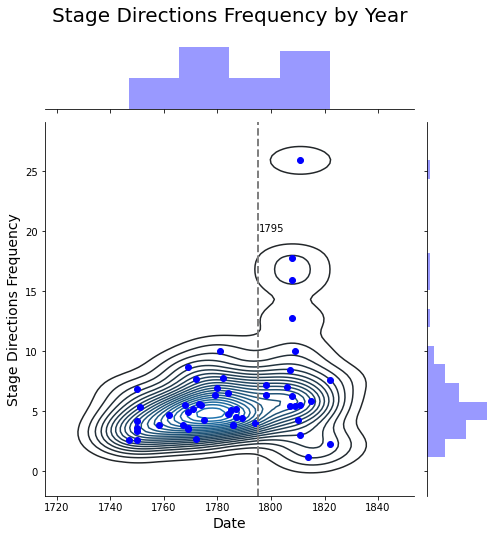

In [54]:
scatter(sperantov_data_sorted, 
        'frequency', 
        'Stage Directions Frequency by Year', 
        'Stage Directions Frequency',
         20)

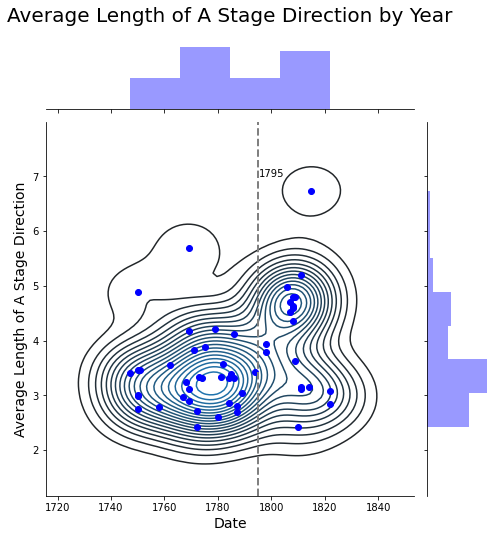

In [55]:
scatter(sperantov_data_sorted, 
        'average_length', 
        'Average Length of A Stage Direction by Year', 
        'Average Length of A Stage Direction',
         7)

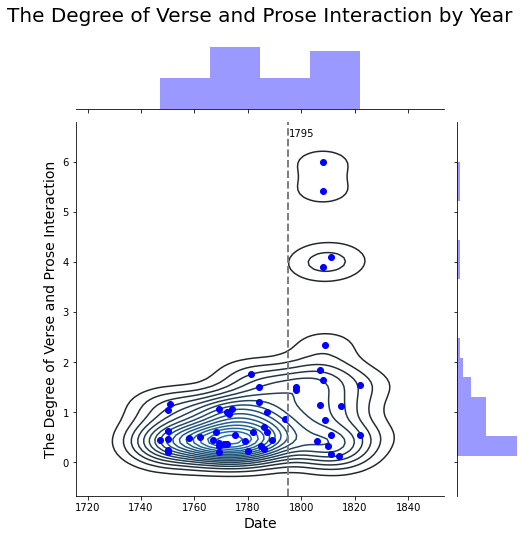

In [56]:
scatter(sperantov_data_sorted, 
        'verse_prose_interaction', 
        'The Degree of Verse and Prose Interaction by Year', 
        'The Degree of Verse and Prose Interaction',
         6.5)

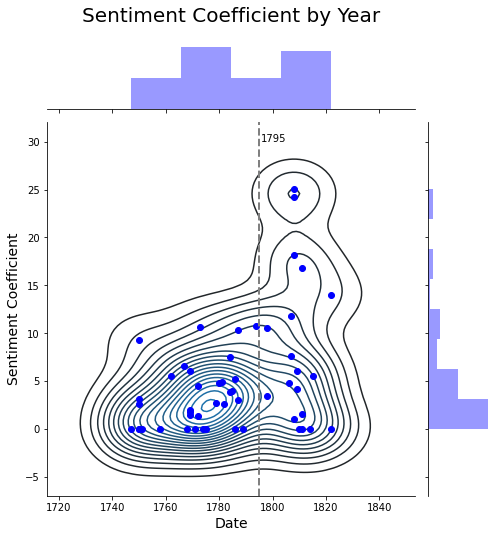

In [57]:
scatter(sperantov_data_sorted, 
        'sentiment_coefficient', 
        'Sentiment Coefficient by Year', 
        'Sentiment Coefficient',
         30)

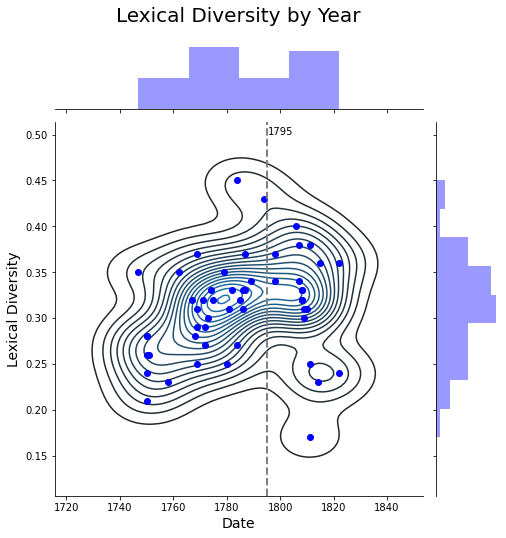

In [58]:
scatter(sperantov_data_sorted, 
        'lexical_diversity', 
        'Lexical Diversity by Year', 
        'Lexical Diversity',
         0.5)

## Part 6. Descriptive Statistics For Two Periods

In [59]:
sperantov_data_sorted.groupby('period').describe().loc[:, 'frequency'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,5.05,1.74,4.75,2.57,10.05
2,8.32,6.03,6.39,1.17,25.91


In [60]:
sperantov_data_sorted.groupby('period').describe().loc[:, 'average_length'][['mean', 
                                                                             'std', 
                                                                             '50%',
                                                                             'min', 
                                                                             'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,3.37,0.67,3.32,2.42,5.69
2,4.13,1.04,4.36,2.42,6.74


In [61]:
sperantov_data_sorted.groupby('period').describe().loc[:, 'verse_prose_interaction'][['mean', 
                                                                                      'std', 
                                                                                      '50%','min', 
                                                                                      'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,0.66,0.39,0.53,0.20,1.77
2,1.84,1.75,1.45,0.13,6.00


In [62]:
sperantov_data_sorted.groupby('period').describe().loc[:, 'sentiment_coefficient'][['mean', 
                                                                                    'std', 
                                                                                    '50%',
                                                                                    'min', 
                                                                                    'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,3.36,3.38,2.64,0.0,10.77
2,8.15,8.14,5.50,0.0,25.10


In [63]:
sperantov_data_sorted.groupby('period').describe().loc[:, 'lexical_diversity'][['mean', 
                                                                                'std', 
                                                                                '50%',
                                                                                'min', 
                                                                                'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,0.31,0.05,0.31,0.21,0.45
2,0.32,0.06,0.33,0.17,0.40


In [64]:
sperantov_data_sorted.head()

,last_name,first_name,title,date,num_acts,translation/adaptation/mixed_genre,frequency,average_length,verse_prose_interaction,lexical_diversity,sentiment_coefficient,Style_Sperantov,period
0,Sumarokov,Aleskandr,Khorev,1747,5,0,2.57,3.41,0.44,0.35,0.00,Conservative Neoclassicism,1
2,Sumarokov,Aleskandr,Sinav i Truvor,1750,5,0,4.19,2.75,0.63,0.28,3.12,Conservative Neoclassicism,1
3,Sumarokov,Aleskandr,Argistona,1750,5,0,2.59,3.47,0.20,0.24,2.63,Conservative Neoclassicism,1
4,Lomonosov,Mikhail,Tamira i Selim,1750,5,0,3.32,2.98,0.25,0.21,0.00,Conservative Neoclassicism,1
5,Trediakovskii,Vasilii,Deidamiia,1750,5,0,6.82,4.88,1.04,0.28,9.24,Non_Classified,1


### Summary:
- The mean values of all features and their standard deviations increased from Period One (1747 to 1794) to Period Two (1795 to 1822).
- The mean frequency of stage directions increased by 65% from 5.05 in Period One to 8.32 in Period Two. The standard deviation of the frequency of stage directions more than tripled from 1.74 to 6.03.
- The average length of stage directions grew by 22% from 3.37 in Period One to 4.13. The standard deviation increased from 0.67 to 1.04.
- The mean degree of verse and prose interaction more than doubled from Period One to Period Two (from 0.66 to 1.84). The standard deviation also increased dramatically from 0.39 to 1.75.
- The mean sentiment coefficient more than doubled from Period One to Period Two (from 3.36 to 8.15). The standard deviation increased from 3.38 to 8.14.
- The mean coefficient of lexical diversity experienced a minor increase from 0.31 to 0.32. The standard deviation also increased from 0.05 to 0.06. This result is consistent with Sperantov's decision to exclude this feature from his analysis since it remained stable over time (Sperantov 1998, 12).

## Conclusions:
1. We addressed the issue of heterogeneity by excluding tragedies that are not in five acts, imitations and adaptations as well as tragedies with choruses.
2. Based on the results of the Shapiro-Wilk test, the coefficient of lexical diversity was the only feature that was normally distributed. Other features, including the frequency of stage directions, the average length of a stage direction, the degree of verse and prose interaction, and the sentiment coefficient were not normally distributed.
3. Because the vast majority of the features were not normally distributed, we decided to run non-parametric statistical tests.
4. We tested the distribution of the features in the four periods that were proposed by Sperantov. We determined that there were significant differences between Periods Two (1763 to 1794) and Three (1795 to 1810) based on four out of five features. The results on the difference between Period One (1747 to 1762) and Period Two (1763 to 1794) were inconclusive: there was a significant difference between these periods based only on two features (stage directions frequency and lexical diversity), one of which (lexical diversity) is unreliable. There was no significant difference between Periods Four and Five.
5. The updated periodization of the Russian five-act tragedy in verse:
 - Period One (from 1747 to 1794)
 - Period Two (from 1795 to 1822).